In [87]:
import csv
from matplotlib import pyplot as plt
import numpy as np

class Trip:
    
    def __init__(self, trip_id, duration, distance, idle):
        self.id = trip_id
        self.duration = duration
        self.distance = distance
        self.idle = idle
        
    @property
    def aver_velocity(self):
        return 0.0 if self.duration == 0 else 3600.0 * self.distance / self.duration
    
    @property
    def pure_velocity(self):
        return 0.0 if self.duration == 0 or self.duration == self.idle \
                   else 3600.0 * self.distance / (self.duration - self.idle)

In [88]:
trips = []

with open('sample_all.txt', 'r') as csvfile:
    trips_reader = csv.reader(csvfile, delimiter=',', quotechar='.')
    idx = 0
    for data in trips_reader:
        idx += 1
        trips.append(Trip(idx, float(data[1]), float(data[2]), float(data[4])))

In [89]:
len(trips)

34969

In [90]:
trips_real = []
dur_zero, dist_zero = 0, 0
for trip in trips:
    if trip.duration == 0:
        dur_zero += 1
    elif trip.distance == 0:
        dist_zero += 1
    else:
        trips_real.append(trip)
trips_real = np.array(trips_real)
print dur_zero, dist_zero, len(trips_real)

40 635 34294


0.08694403853973197 0.11744151884991334 34294


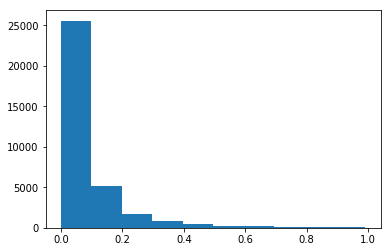

In [91]:
idles = np.array([1.0 * trip.idle / trip.duration for trip in trips_real])

print idles.mean(), idles.std(), len(idles)
plt.hist(idles)
plt.show()

9.514645946780133


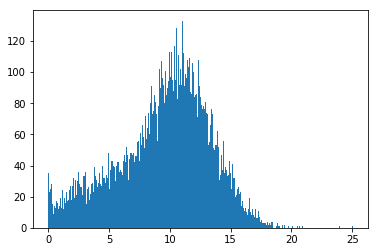

10.344861996894588


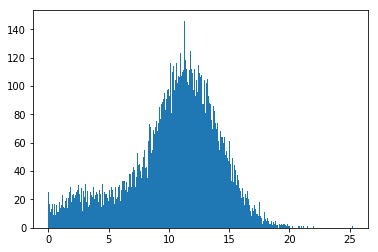

In [99]:
vs = np.array([trip.aver_velocity for trip in trips_real])
vs_pure = np.array([trip.pure_velocity for trip in trips_real])

print vs.mean()
plt.hist(vs, bins=1000)
plt.show()
print vs_pure.mean()
plt.hist(vs_pure, bins=1000)
plt.show()

In [100]:
low_speed_trips = [trip for trip in trips_real if trip.pure_velocity < 5]
print len(low_speed_trips)
ids = [trip.id for trip in low_speed_trips]
#print ids

3961


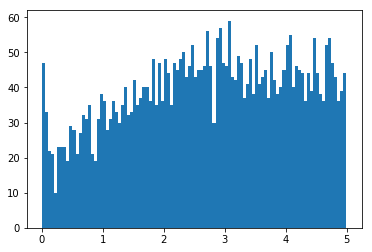

In [101]:
plt.hist([trip.pure_velocity for trip in low_speed_trips], bins=100)
plt.show()

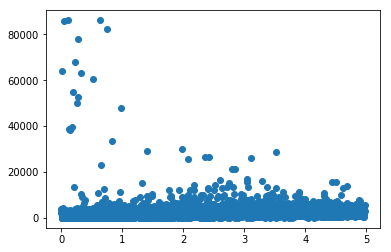

In [86]:
idles = [trip.idle for trip in low_speed_trips]
ds = [trip.distance for trip in low_speed_trips]
ts = [trip.duration for trip in low_speed_trips]
vs = [trip.aver_velocity for trip in low_speed_trips]

plt.scatter(vs, ts)
plt.show()